## 넷플릭스 데이터

분석 목적: 데이터를 활용한 트렌드 분석 (기간별, 국가별, 장르별 등)


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import datetime

## 0. 데이터 불러오기

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
netflix = pd.read_csv('/content/drive/MyDrive/주니어 세션/netflix_titles.csv', encoding = 'utf-8-sig')

## 1. 전체 데이터 살펴보기

In [4]:
netflix.shape

(8807, 12)

In [5]:
display(netflix.head())
display(netflix.tail())

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [6]:
# 정보 확인하기
# release_year만 int형

netflix.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# 수치형 정보 확인
# 1925년부터 2021년 사이에 개봉된 작품
# ?std는 어떻게 해석할 수 있는지

netflix.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [8]:
# 범주형 정보 확인
# type의 unique값 2개
# listed_in의 unique값 514 > 장르가 이렇게나 많을 수 있나?

netflix.describe(include = np.object_)

,show_id,type,title,director,cast,country,date_added,rating,duration,listed_in,description
count,8807,8807,8807,6173,7982,7976,8797,8803,8804,8807,8807
unique,8807,2,8807,4528,7692,748,1767,17,220,514,8775
top,s1,Movie,Dick Johnson Is Dead,Rajiv Chilaka,David Attenborough,United States,"January 1, 2020",TV-MA,1 Season,"Dramas, International Movies","Paranormal activity at a lush, abandoned prope..."
freq,1,6131,1,19,19,2818,109,3207,1793,362,4


In [9]:
#unique values 확인
#listed_in의 경우 하나의 작품이 여러 장르에 해당하는 경우가 있음

print("--type--\n", netflix['type'].unique())
print("--listed_in--\n", netflix['listed_in'].unique()[:10])

--type--
 ['Movie' 'TV Show']
--listed_in--
 ['Documentaries' 'International TV Shows, TV Dramas, TV Mysteries'
 'Crime TV Shows, International TV Shows, TV Action & Adventure'
 'Docuseries, Reality TV'
 'International TV Shows, Romantic TV Shows, TV Comedies'
 'TV Dramas, TV Horror, TV Mysteries' 'Children & Family Movies'
 'Dramas, Independent Movies, International Movies'
 'British TV Shows, Reality TV' 'Comedies, Dramas']


## 2.결측치 확인하기
*이상치는 연속형 변수가 1개라 확인할 필요없을듯

In [10]:
# 결측치 개수 확인

netflix.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [11]:
# 결측치 비율 확인
# director의 결측치 비울이 약 30%

netflix.isnull().sum() / len(netflix) *100

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

<Axes: >

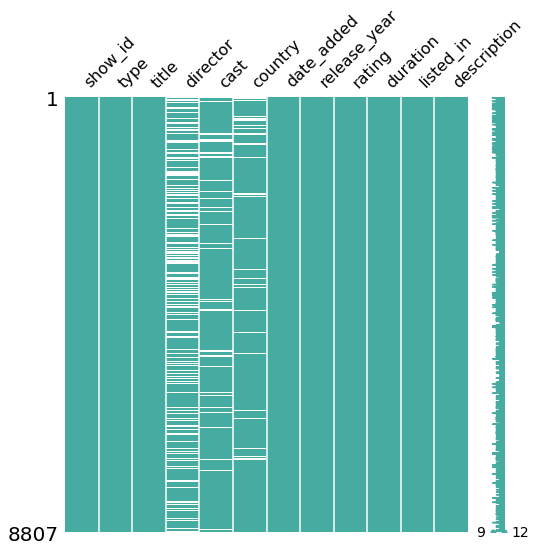

In [12]:
# 결측치 위치 시각화
# director에서 가장 많은 결측치가 발생함
# 두번째로 cast와 country에서 비슷하게 발생

msno.matrix(df=netflix, figsize=(8, 8), color=(70/255, 172/255, 161/255))

## 3.변수의 분포 확인하기

#### type
- 이상치, 결측치, 중복값 없음
- Movie가 약 70% 차지

In [16]:
display(netflix["type"].value_counts())

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [15]:
display(netflix["type"].value_counts() / len(netflix) )

Movie      0.696151
TV Show    0.303849
Name: type, dtype: float64

#### release year


(array([1.000e+00, 0.000e+00, 0.000e+00, 8.000e+00, 7.000e+00, 0.000e+00,
        1.000e+01, 1.100e+01, 1.300e+01, 1.400e+01, 4.000e+01, 5.900e+01,
        5.400e+01, 9.600e+01, 9.900e+01, 1.950e+02, 3.520e+02, 7.550e+02,
        2.339e+03, 4.754e+03]),
 array([1925. , 1929.8, 1934.6, 1939.4, 1944.2, 1949. , 1953.8, 1958.6,
        1963.4, 1968.2, 1973. , 1977.8, 1982.6, 1987.4, 1992.2, 1997. ,
        2001.8, 2006.6, 2011.4, 2016.2, 2021. ]),
 <BarContainer object of 20 artists>)

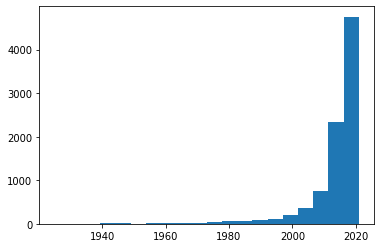

In [22]:
plt.hist(netflix['release_year'], 20)

급하게 해서 많이 부족합니다..나중에 더 추가로 분석해보겠습니다ㅠㅠ